In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_excel('Tech Ops - Defect Dump - April 11 2019_karthick.xlsx',sheet_name='Oct2017allsev')
test_df = pd.read_excel('Tech Ops - Defect Dump - April 11 2019_karthick.xlsx',sheet_name='Oct2017testsheet')

In [128]:
df

Release  AC Capabilities  \
0   2018 December UNSCHEDULED Weight&Balance Stories                0   
1          2018 EVA Production Validation Regression                0   
2                                2018 EVA Release 10                0   
3                                2018 EVA Release 11                0   
4                                2018 EVA Release 12                0   
5                2018 EVA Release 12.5 2nd Off Cycle                0   
6                    2018 EVA Release 12.5 Off Cycle                0   
7                                       2018 Invicta                0   
8             2018 Weight and Balance Production Fix                0   
9                           AO_2017_December_17.12.0                0   
10                           AO_2017_November17.11.0                0   
11                  AO_2017_October_R17.10.0 Release                0   
12                            AO_April_2018_18.04.01                0   
13    AO_February_2018_18.02.01 Wizard and Bartender                0   
14                            AO_January_2018_18.1.0                0   
15                                  AO_January_2019_                0   
16                                     AO_June_2018_                0   
17                            AO_March_2018_18.03.01                0   
18                         AO_September2018_18.09.01                0   
19                                         DE Phase1                0   
20                                              EPPV                0   
21                       EVA  R10 - Performance Test                0   
22                 EVA - R11 Monitoring and Alerting                0   
23                          EVA - R11 Security Tests                0   
24                 EVA - R12 Monitoring and Alerting                0   
25                          EVA - R12 Security Tests                0   
26      EVA - R12.5 Off Cyle Monitoring and Alerting                0   
27                                EVA R11 - HA tests                0   
28                        EVA R11 - Performance Test                0   
29                                EVA R12 - HA Tests                0   
..                                               ...              ...   
52                     Mosaic Performance Release 11                2   
53                     Mosaic Performance Release 12               56   
54                     Mosaic Performance Release 14              159   
55                     Mosaic Performance Release 15                0   
56                     Mosaic Performance Release 16               13   
57                     Mosaic Performance Release 17                6   
58                      Mosaic Performance Release 8                0   
59                      Mosaic Performance Release 9                0   
60                                 Mosaic Release 10               32   
61                                 Mosaic Release 11                0   
62                                 Mosaic Release 12                0   
63                                 Mosaic Release 14              110   
64                                 Mosaic Release 15                0   
65                                 Mosaic Release 16                9   
66                                 Mosaic Release 17               38   
67                                  Mosaic Release 8                0   
68                                  Mosaic Release 9               25   
69                        Mosaic Security Release 10                0   
70                        Mosaic Security Release 11                0   
71                        Mosaic Security Release 12               63   
72                        Mosaic Security Release 14                5   
73                        Mosaic Security Release 15                0   
74                        Mosaic Security Release 16                6   
75                        Mosa

In [21]:
# df.fillna(0,inplace=True)

In [129]:
df.set_index('Release',inplace=True)

In [130]:
df.iloc[:,1:-1]= df.iloc[:,:-1].applymap(lambda x: 0 if (x==0) else 1)

In [131]:
df.columns.nunique()

65

In [28]:
#df['AC Capabilities'] =  df['AC Capabilities'].astype('int64')

In [132]:
test_df.set_index('Release',inplace=True)

In [100]:
np.sum(test_df,axis=1)

Release
Release X    26
dtype: int64

In [133]:
Y = df['Total Result']
X = df.iloc[:,df.columns != 'Total Result']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [151]:
from sklearn.metrics import mean_squared_error,r2_score 

In [152]:
from sklearn.ensemble import RandomForestRegressor
seed =123
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [148]:
rf.predict(test_df)

array([101.4])

In [19]:
y_train

Release
EVA R12.5 Off Cyle - HA Tests                     78
R16.2.1 (April 2016)                              32
Mosaic Release 17                                267
EVA - R12.5 Off Cyle Monitoring and Alerting     444
Mosaic Monitoring and Alerting                     9
Mosiac UAT Reports                                 0
2018 EVA Release 12.5 Off Cycle                   77
Mosaic Security Release 10                      2881
Mosaic Release 16                                900
Legacy Message Mover                               3
Mosaic Monitoring and Alerting Release 12         18
HOPE Phase 1 - Functional                         79
AO_January_2018_18.1.0                             1
Mosaic Release 14                               1799
EVA R12.5 Off Cyle - Performance Test             13
NaN                                              447
2018 Weight and Balance Production Fix           178
Mosaic High Availability Release 15               49
September Offcycle                    

In [153]:
np.sqrt(mean_squared_error(y_train,rf.predict(X_train)))

24.762384079269914

In [154]:
np.sqrt(mean_squared_error(y_test,rf.predict(X_test)))

51.000498610514796

In [155]:
r2_score(y_train,rf.predict(X_train))

0.8836984136276635

In [156]:
r2_score(y_test,rf.predict(X_test))

0.34424091176183047

In [38]:
rf_importance = pd.DataFrame(rf.feature_importances_,columns=['importance'])
rf_importance['feature'] = X_train.columns

# plt.figure(figsize=(15,8))
# plt.bar(X_train.columns,rf.feature_importances_)
# plt.xticks(X_train.columns,rotation=90)

In [39]:
rf_importance = rf_importance.sort_values(by='importance',ascending=False)

([<matplotlib.axis.XTick at 0x7fb3370629e8>,
 <a list of 66 Text xticklabel objects>)

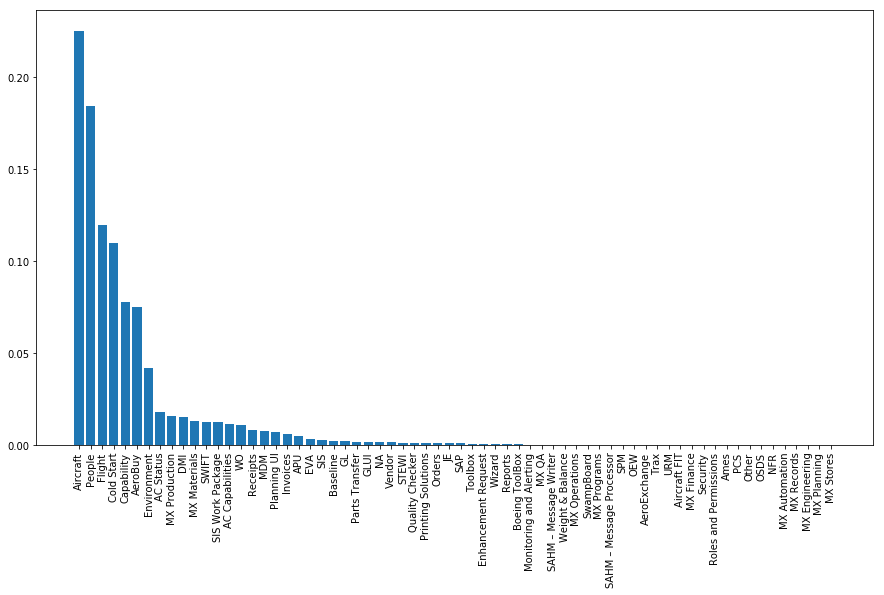

In [40]:
plt.figure(figsize=(15,8))
plt.bar(rf_importance.feature,rf_importance.importance)
plt.xticks(rf_importance.feature,rotation=90)